In [87]:
#Importing necessary libraries
import math
import numpy as np
import random
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import copy

In [88]:
class kmeans:
    def __init__(self, k, trainData, nIter):
        self.k = k
        self.trainData = trainData
        self.N = trainData.shape[0]
        self.labels = [-1 for i in range(self.N)]
        self.nIter = nIter
        
    def fit(self):
        d = self.trainData.shape[1]
        centroids = [0 for i in range(self.k)]
        
        # Randomly initailize k centroids as k samples
        for i in range(self.k):
            centroids[i] = self.trainData[random.randint(0,self.N - 1)]
        
        centroids = np.array(centroids)
        
        for l in range(self.nIter):
            prevLabels = copy.copy(self.labels)
            # Assigning samples to clusters
            for i in range(self.N):
                temp = [self.euclideanDist(trainData[i], centroids[j]) for j in range(self.k)]
                tempMin = min(temp)
                self.labels[i] = temp.index(tempMin)
            # Plotting graph after each iteration
            self.plotGraph(l)
            
            isConverged = self.findLabelDiff(prevLabels)
            if(isConverged == True):
                break

            # Recalculating the Centroids
            nPerClass = [0 for j in range(self.k)]
            tempCentroids = [[0 for j in range(d)] for i in range(self.k)]
            for i in range(self.N):
                tempLabel = self.labels[i]
                tempCentroids[tempLabel] += self.trainData[i]
                nPerClass[tempLabel] += 1
            
            tempCentroids = np.array(tempCentroids)
            for j in range(self.k):
                centroids[j] = tempCentroids[j] / nPerClass[j]
            
        return self.labels
    
    def plotGraph(self,l):
        colorList = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
        plt.title("Data Points after iteration "+ str(l))
        for i in range(self.N):
            plt.scatter(self.trainData[i,0],self.trainData[i,1],color=colorList[self.labels[i]])
        plt.show()
        
            
    def findLabelDiff(self,prevLabels):
        c = 0
        for i in range(self.N):
            if (prevLabels[i] != self.labels[i]):
                c += 1
        c /= self.N
        if(c==0):
            return True
        return False

    def euclideanDist(self, x, y):
        return np.sqrt(np.sum((x-y)**2))
            

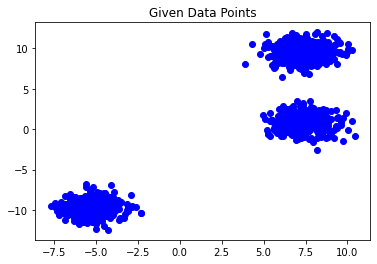

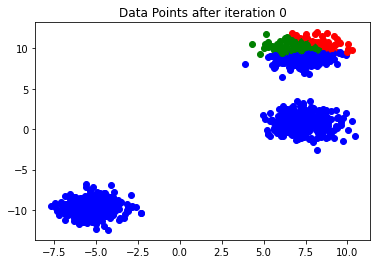

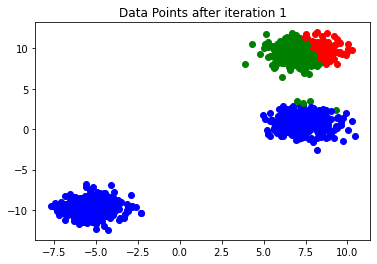

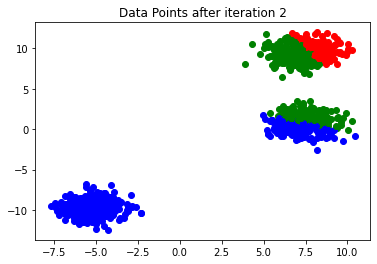

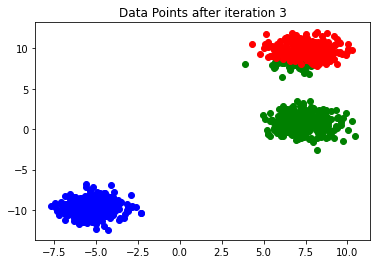

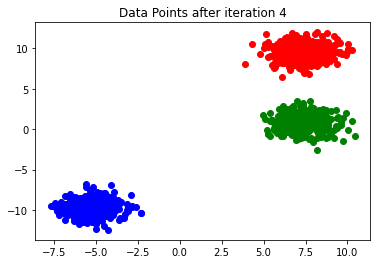

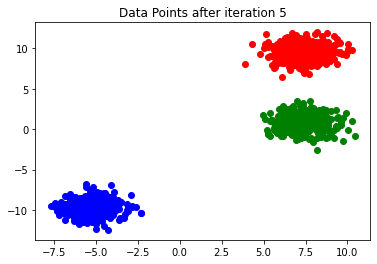

[1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 

In [89]:
k = 3
trainData, y = make_blobs(centers = k, n_samples = 1000, n_features = 2, shuffle = True, random_state = random.randint(0,100))
trainData = np.array(trainData)

x = (trainData[:,0])
y = (trainData[:,1])

plt.title("Given Data Points")
plt.scatter(x, y, color = 'b')
plt.show()

obj = kmeans(k, trainData, 100)
print(obj.fit())
             